<a href="https://colab.research.google.com/github/qfx4yk/ds1002-qfx4yk/blob/main/in-class%20exercises/10-pandas-more.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas DataFrames II

```
  University of Virginia
  Programming for Data Science
  Last Updated: September 22, 2023
```  

### PREREQUISITES
- variables
- data types
- operators
- numpy arrays


### SOURCES

- sort_values()  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html


- value_counts()  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html


- to_csv() : saving to CSV file  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html


- read_csv() : load CSV file into DataFrame  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html


- dropna() : drop missing data  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html


- fillna() : impute missing data  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html


### OBJECTIVES
- Introduce pandas dataframes and the essential operations

In [2]:
#import dependencies
import pandas as pd

# Load Iris Dataset

Let's load a bigger data set to explore more functionality.

The function `load_dataset()` in the `seaborn` package loads the built-in dataset.

You may need to install `seaborn` first:

`!pip install seaborn`

In [3]:
import seaborn as sns # visualization tool
iris = sns.load_dataset('iris')

# Notice there is no CSV for the "iris" data file, it's a built-in sample in Seaborn

Check the data type of `iris`:

In [4]:
type(iris)

pandas.core.frame.DataFrame

**`.head()`**
- first records in dataframe

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


**`.tail()`**
* last records in dataframe

In [7]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [8]:
iris.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Inspect metadata

**`.dtypes`**

In [9]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

**`.shape`**
* (rows, columns):

In [10]:
iris.shape

(150, 5)

**`len()`**
* returns row (record) count:

In [11]:
len(iris)

150

**`.columns`**  
* column names:

In [12]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

**`.info()`**

In [13]:
iris.info()

# "non-null" means that there is no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Set the index

**`.index`**

In [14]:
iris.index

RangeIndex(start=0, stop=150, step=1)

**`.name`**
* name the index 'obs_id'

In [15]:
iris.index.name = 'obs_id'
iris

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica


**`reset_index`**

In [16]:
iris.reset_index()

,obs_id,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,virginica
146,146,6.3,2.5,5.0,1.9,virginica
147,147,6.5,3.0,5.2,2.0,virginica
148,148,6.2,3.4,5.4,2.3,virginica


We can also redefine indexes to reflect the logic of our data.

In this data set, the species of the flower is part of its **identity**, so it can be part of the index.

(Note that is also a label that can be used for training a model to predict the species of an iris flower. In that use case, the column would be pulled out into a separate vector.)

**`.set_index`**

In [17]:
iris_w_idx = iris.reset_index().set_index(['species','obs_id'])

In [18]:
iris_w_idx

sepal_length  sepal_width  petal_length  petal_width
species   obs_id                                                      
setosa    0                5.1          3.5           1.4          0.2
          1                4.9          3.0           1.4          0.2
          2                4.7          3.2           1.3          0.2
          3                4.6          3.1           1.5          0.2
          4                5.0          3.6           1.4          0.2
...                        ...          ...           ...          ...
virginica 145              6.7          3.0           5.2          2.3
          146              6.3          2.5           5.0          1.9
          147              6.5          3.0           5.2          2.0
          148              6.2          3.4           5.4          2.3
          149              5.9          3.0           5.1          1.8

[150 rows x 4 columns]

# Row Selection (Filtering)

**`iloc[]`**

You can extract rows using **indexes** with `iloc[]`.



In [19]:
# This fetches row 3, and all columns:

iris.iloc[2]

sepal_length       4.7
sepal_width        3.2
petal_length       1.3
petal_width        0.2
species         setosa
Name: 2, dtype: object

fetch rows with indices 1,2 (the right endpoint is exclusive), and all columns.

In [20]:
iris.iloc[1:3]

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


fetch rows with indices 1,2 and first three columns (positions 0, 1, 2)

In [21]:
iris.iloc[1:3, 0:3]

,sepal_length,sepal_width,petal_length
obs_id,,,
1,4.9,3.0,1.4
2,4.7,3.2,1.3


You can apply slices to column names too. You don't need `.iloc[]` here.

In [22]:
iris.columns[0:3]

Index(['sepal_length', 'sepal_width', 'petal_length'], dtype='object')

## `.loc[]`

Filtering can also be done with `.loc[]`. This uses the row, column labels (names).

Here we ask for rows with labels (indexes) 1-3, and it gives exactly that  
`.iloc[]` returned rows with indices 1,2.

**Author note: This is by far the more useful of the two in my experience.**

In [23]:
iris.loc[1:3]

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


Subset on columns with column name (as a string) or list of strings

In [24]:
iris.loc[1:3, ['sepal_length','petal_width']]

,sepal_length,petal_width
obs_id,,
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2


Select all rows, specific columns

In [25]:
iris.loc[:, ['sepal_length','petal_width']]

,sepal_length,petal_width
obs_id,,
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
...,...,...
145,6.7,2.3
146,6.3,1.9
147,6.5,2.0


## `.loc[]` with MultiIndex

In [26]:
iris_w_idx.loc['versicolor']

,sepal_length,sepal_width,petal_length,petal_width
obs_id,,,,
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
55,5.7,2.8,4.5,1.3
56,6.3,3.3,4.7,1.6
57,4.9,2.4,3.3,1.0
58,6.6,2.9,4.6,1.3


In [27]:
iris_w_idx.loc['setosa', 'sepal_length'].head()

obs_id
0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

In [28]:
iris_w_idx.loc['setosa', 'sepal_length'].to_frame().head()

,sepal_length
obs_id,
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


We use a tuple to index multiple index levels.

Note that you can't pass slices here -- and this where indexing can get sticky.

In [29]:
iris_w_idx.loc[('versicolor', 52)]

sepal_length    6.9
sepal_width     3.1
petal_length    4.9
petal_width     1.5
Name: (versicolor, 52), dtype: float64

## Another Example

In [30]:
df_cat = pd.DataFrame(
    index=['burmese', 'persian', 'maine_coone'],
    columns=['x'],
    data=[2,1,3]
)

In [31]:
df_cat

,x
burmese,2
persian,1
maine_coone,3


In [32]:
df_cat.iloc[:2]

,x
burmese,2
persian,1


In [33]:
df_cat.iloc[0:1]

,x
burmese,2


In [34]:
df_cat.loc['burmese']

x    2
Name: burmese, dtype: int64

In [35]:
df_cat.loc[['burmese','maine_coone']]

,x
burmese,2
maine_coone,3


# Boolean Filtering

It's very common to subset a dataframe based on some condition on the data.

🔑 Note that even though we are filtering rows, we are not using `.loc[]` or `.iloc[]` here.

Pandas knows what to do if you pass a boolean structure.

In [74]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica


In [75]:
# outputs boolean values
iris.sepal_length >= 7.5

obs_id
0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: sepal_length, Length: 150, dtype: bool

In [77]:
# iris data frame is given a filter and displays the part of the data that meets the criteria
# by populating the variable new_iris, you are creating a new data frame
new_iris = iris[iris.sepal_length >= 7.5]
new_iris

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
105,7.6,3.0,6.6,2.1,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
131,7.9,3.8,6.4,2.0,virginica
135,7.7,3.0,6.1,2.3,virginica


In [79]:
print(iris.shape)
print(new_iris.shape)

(150, 5)
(6, 5)


In [81]:
# creating a new copy of your iris data
my_iris_copy = iris.copy()

In [38]:
iris[(iris['sepal_length' ]>= 4.5) & (iris['sepal_length'] <= 4.7)]

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
22,4.6,3.6,1.0,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
47,4.6,3.2,1.4,0.2,setosa


## Masking

Here's an example of **masking** using boolean conditions passed to the dataframe selector:

Here are the **values** for the feature `sepal length`:

In [39]:
iris.sepal_length.values

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

And here are **the boolean values** generated by applying a comparison operator to those values:

In [40]:
mask = iris.sepal_length >= 7.5

In [41]:
mask.values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False, False,
       False, False,

The two sets of values have the same shape.

We can now overlay the logical values over the numeric ones and keep only what is `True`:

In [42]:
iris.sepal_length[mask].values

array([7.6, 7.7, 7.7, 7.7, 7.9, 7.7])

# Working with Missing Data

Pandas primarily uses the data type `np.nan` from NumPy to represent missing data.

In [43]:
import numpy as np

In [44]:
df_miss = pd.DataFrame({
    'x':[2, np.nan, 1],
    'y':[np.nan, np.nan, 6]}
)

In [45]:
df_miss

,x,y
0,2.0,NaN
1,NaN,NaN
2,1.0,6.0


## `.dropna()`

This will drop all rows with missing data in any column.

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [46]:
df_drop_all = df_miss.dropna()
df_drop_all

,x,y
2,1.0,6.0


The `subset` parameter takes a list of column names to specify which columns should have missing values.

In [47]:
df_drop_x = df_miss.dropna(subset=['x'])
df_drop_x

,x,y
0,2.0,NaN
2,1.0,6.0


## `.fillna()`

This will replace missing values with whatever you set it to, e.g. $0$s.

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

We can pass the results of an operation -- for example to peform simple imputation, we can replace missing values in each column with the median value of the respective column:

In [48]:
df_filled = df_miss.fillna(df_miss.median())

In [49]:
df_filled

,x,y
0,2.0,6.0
1,1.5,6.0
2,1.0,6.0


# Sorting

**`.sort_values()`**

Sort by values
- `by` parameter takes string or list of strings
- `ascending` takes True or False
- `inplace` will save sorted values into the df

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [50]:
iris.sort_values(by=['sepal_length','petal_width'])

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
13,4.3,3.0,1.1,0.1,setosa
8,4.4,2.9,1.4,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
42,4.4,3.2,1.3,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
...,...,...,...,...,...
122,7.7,2.8,6.7,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica


## `.sort_index()`

Sort by index. Example sorts by descending index

In [51]:
iris.sort_index(axis=0, ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
149,5.9,3.0,5.1,1.8,virginica
148,6.2,3.4,5.4,2.3,virginica
147,6.5,3.0,5.2,2.0,virginica
146,6.3,2.5,5.0,1.9,virginica
145,6.7,3.0,5.2,2.3,virginica
...,...,...,...,...,...
4,5.0,3.6,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


# Statistics

**`describe()`**

In [52]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [53]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [54]:
iris.species.describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [55]:
iris.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

**`value_counts()`**

This is **a highly useful** function for showing the frequency for each distinct value.  

Parameters give the ability to sort by count or index, normalize, and more.  

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)

In [56]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Show percentages instead of counts

In [57]:
iris.species.value_counts(normalize=True)

setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: species, dtype: float64

The methods returns a series that can be converted into a dataframe.

In [58]:
SEPAL_LENGTH = iris.sepal_length.value_counts().to_frame('n')

In [59]:
SEPAL_LENGTH

,n
5.0,10
5.1,9
6.3,9
5.7,8
6.7,8
5.8,7
5.5,7
6.4,7
4.9,6
5.4,6


You can run `.value_counts()` on a column to get a kind of histogram:

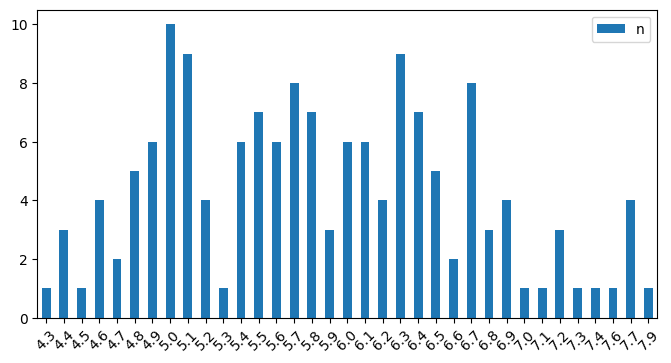

In [60]:
SEPAL_LENGTH.sort_index().plot.bar(figsize=(8,4), rot=45);

**`.mean()`**

Operations like this generally exclude missing data.

So, it is important to convert missing data to values if they need to be considered in the denominator.

In [61]:
iris.sepal_length.mean()

5.843333333333334

**`.max()`**

In [62]:
iris.sepal_length.max()

7.9

**`.std()`**

This standard deviation.

In [63]:
iris.sepal_length.std()

0.828066127977863

**`.corr()`**

In [64]:
iris.corr()

<ipython-input-64-156dd03bc859>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Correlation can be computed on two fields by subsetting on them:

In [65]:
iris[['sepal_length','petal_length']].corr()

,sepal_length,petal_length
sepal_length,1.000000,0.871754
petal_length,0.871754,1.000000


In [66]:
iris[['sepal_length','petal_length','sepal_width']].corr()

,sepal_length,petal_length,sepal_width
sepal_length,1.000000,0.871754,-0.11757
petal_length,0.871754,1.000000,-0.42844
sepal_width,-0.117570,-0.428440,1.00000


# Styling

In [67]:
iris.corr().style.background_gradient(cmap="Spectral", axis=None)

<ipython-input-67-d2308186704d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr().style.background_gradient(cmap="Spectral", axis=None)


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [68]:
iris.corr().style.bar(axis=None)

<ipython-input-68-0fcfd0cf86f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr().style.bar(axis=None)


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


# Visualization

Scatterplot using Seaborn on the df columns `sepal_length`, `petal_length`.


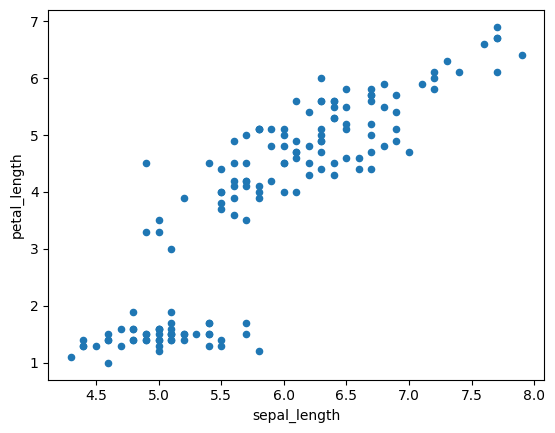

In [69]:
iris.plot.scatter('sepal_length', 'petal_length');

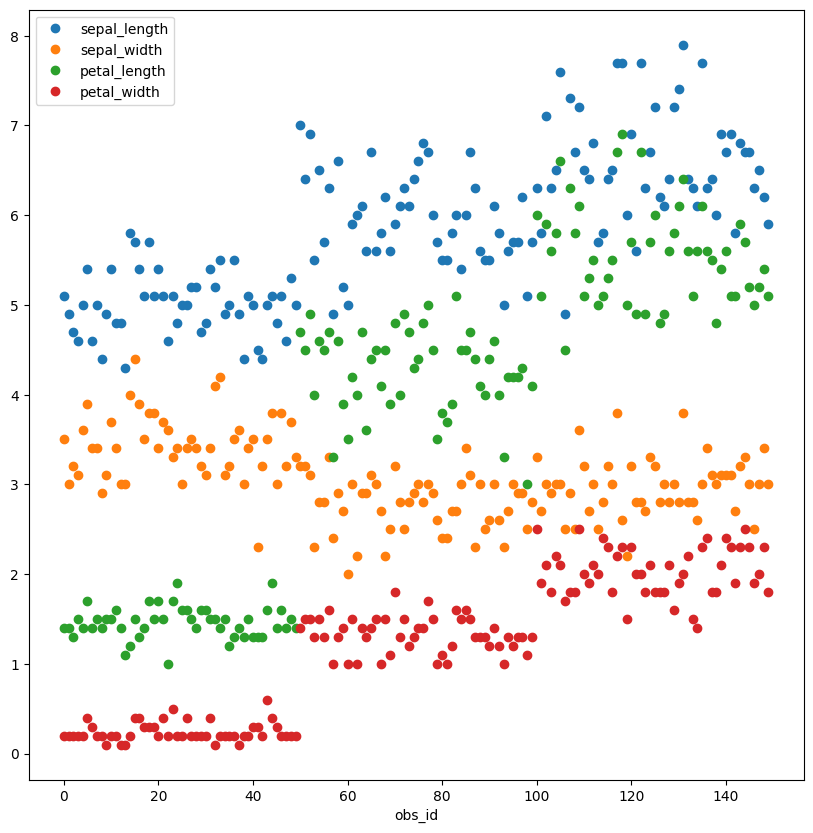

In [70]:
iris.sort_values(list(iris.columns)).plot(style='o', figsize=(10,10));

In [71]:
from pandas.plotting import scatter_matrix

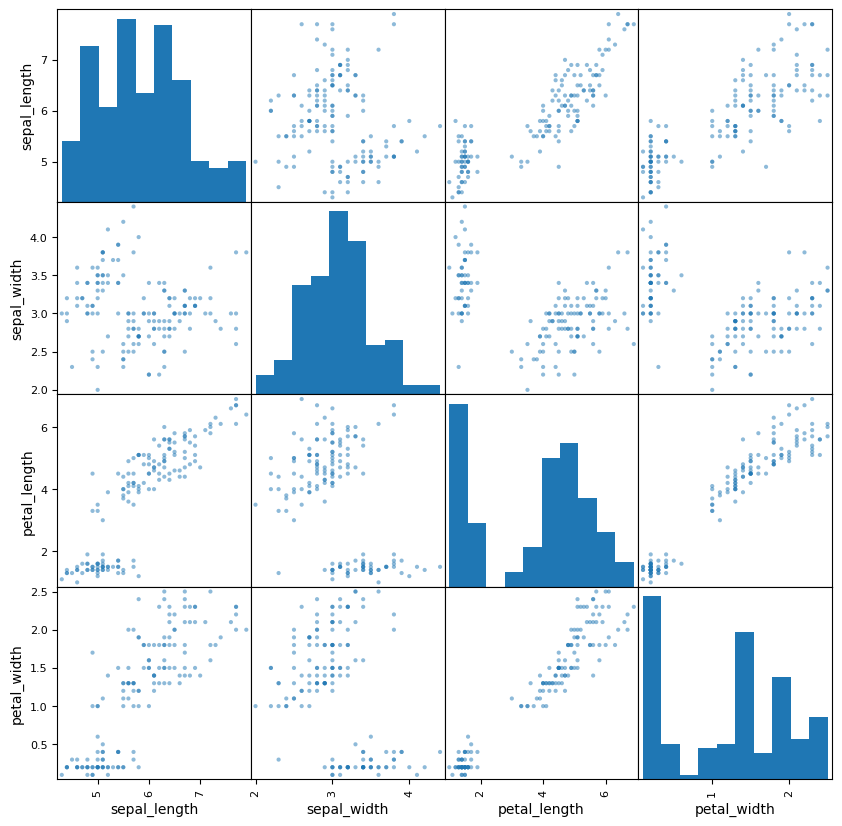

In [72]:
scatter_matrix(iris, figsize=(10,10));

# Save to CSV File

Common to save df to a csv file. The full path (path + filename) is required.  

There are also options to save to a database and to other file formats,

Common optional parameters:
- `sep` - delimiter
- `index` - saving index column or not

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

In [73]:
iris.to_csv('./iris_data.csv')